# fdfdpy example problems notebook

In [2]:
import numpy as np
from fdfdpy import Simulation

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Electric point dipole

This example demonstrates solving for the fields of a radiating electric point dipole (out of plane electric current).

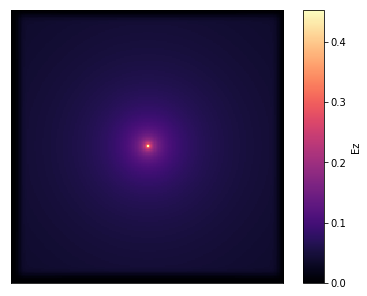

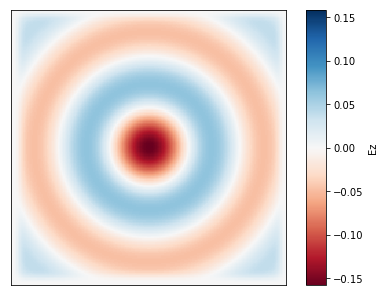

In [5]:
omega = 2*np.pi*200e12
dl = 0.02 # grid size (units of L0, which defaults to 1e-6)
eps_r = np.ones((200, 200)) # relative permittivity
NPML = [15, 15] # number of pml grid points on x and y borders

simulation = Simulation(omega, eps_r, dl, NPML, 'Ez')
simulation.src[100, 100] = 1
simulation.solve_fields()

simulation.plt_abs(outline=False, cbar=True);
simulation.plt_re(outline=False, cbar=True);

## Ridge waveguide

This example demonstrates solving for the fields of a waveguide excited by a modal source.

input power of 0.0016689050319357455 in W/L0


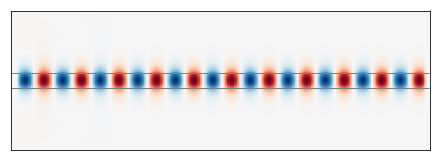

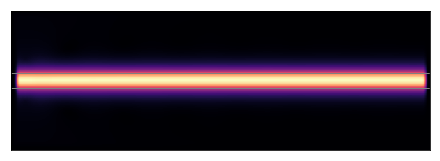

In [7]:
omega = 2*np.pi*200e12
dl = 0.01 # grid size (units of L0, which defaults to 1e-6)
eps_r = np.ones((600, 200)) # relative permittivity
eps_r[:,90:110] = 12.25 # set waveguide region
NPML = [15, 15] # number of pml grid points on x and y borders

simulation = Simulation(omega, eps_r, dl, NPML, 'Ez')
simulation.add_mode(3.5, 'x', [20, 100], 60, scale=10)
simulation.setup_modes()
simulation.solve_fields()
print('input power of {} in W/L0'.format(simulation.W_in))

simulation.plt_re(outline=True, cbar=False);
simulation.plt_abs(outline=True, cbar=False);

### Making an animation 

This demonstrates how one can generate an animation of the field.

In [9]:
from matplotlib import animation, rc
from IPython.display import HTML
from fdfdpy.plot import plt_base_ani
animation = plt_base_ani(simulation.fields["Ez"], cbar=True, Nframes=40, interval=80)

HTML(animation.to_html5_video())
# animation.save('fields.gif', dpi=80, writer='imagemagick')

RuntimeError: Requested MovieWriter (ffmpeg) not available